In [1]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, cross_val_score
 
import pickle
import openpyxl


In [2]:



pcos = pd.read_csv('pcos_cleaned.csv')


In [3]:

pcos.describe()

,Unnamed: 0,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.037037,0.325926,31.405556,59.590185,156.491289,24.285370,13.800000,73.459259,19.246296,11.158481,...,0.488889,0.514815,0.248148,114.833333,77.055556,6.122222,6.625926,15.018148,15.448833,8.483648
std,156.460083,0.469154,5.384335,10.984220,6.037270,4.025824,1.841795,2.687877,1.689344,0.866952,...,0.500340,0.500244,0.432339,5.919215,4.722019,4.229925,4.426358,3.570146,3.321255,2.141611
min,0.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,70.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,100.000000,60.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,134.750000,0.000000,27.750000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,270.500000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,405.250000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,540.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [4]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              540 non-null    int64  
 1   PCOS (Y/N)              540 non-null    int64  
 2    Age (yrs)              540 non-null    int64  
 3   Weight (Kg)             540 non-null    float64
 4   Height(Cm)              540 non-null    float64
 5   BMI                     540 non-null    float64
 6   Blood Group             540 non-null    int64  
 7   Pulse rate(bpm)         540 non-null    int64  
 8   RR (breaths/min)        540 non-null    int64  
 9   Hb(g/dl)                540 non-null    float64
 10  Cycle(R/I)              540 non-null    int64  
 11  Cycle length(days)      540 non-null    int64  
 12  Marraige Status (Yrs)   540 non-null    float64
 13  Pregnant(Y/N)           540 non-null    int64  
 14  No. of abortions        540 non-null    in

In [5]:
y = pcos["PCOS (Y/N)"]
X = pcos.drop(["PCOS (Y/N)"], axis=1)

In [6]:

sc = MinMaxScaler(feature_range = (0, 1))
pcos_scaled = sc.fit_transform(pcos)

In [7]:
pcos_scaled = pd.DataFrame(pcos_scaled)
pcos_scaled

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.000000,0.0,0.285714,0.176623,0.348837,0.260377,0.571429,0.666667,0.500000,0.314286,...,0.0,1.0,0.0,0.25,0.50,0.136364,0.15,0.750000,0.750000,0.40625
1,0.001852,0.0,0.571429,0.441558,0.569767,0.471698,0.571429,0.333333,0.333333,0.507937,...,0.0,0.0,0.0,0.50,0.25,0.136364,0.25,0.625000,0.583333,0.10625
2,0.003704,1.0,0.464286,0.490909,0.651163,0.486792,0.000000,0.166667,0.166667,0.523810,...,1.0,1.0,0.0,0.50,0.50,0.590909,0.75,0.750000,0.833333,0.50000
3,0.005556,0.0,0.607143,0.441558,0.255814,0.652830,0.285714,0.166667,0.333333,0.555556,...,0.0,0.0,0.0,0.50,0.25,0.090909,0.10,0.625000,0.583333,0.34375
4,0.007407,0.0,0.178571,0.272727,0.558140,0.290566,0.000000,0.166667,0.166667,0.238095,...,0.0,0.0,0.0,0.50,0.50,0.136364,0.20,0.666667,0.583333,0.31250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.992593,0.0,0.535714,0.246753,0.641674,0.230189,0.857143,0.166667,0.000000,0.396825,...,0.0,0.0,0.0,0.25,0.25,0.045455,0.00,0.729167,0.416667,0.29375
536,0.994444,0.0,0.357143,0.418182,0.488372,0.486792,0.571429,0.166667,0.166667,0.365079,...,0.0,0.0,0.0,0.25,0.25,0.409091,0.35,0.791667,0.750000,0.38750
537,0.996296,0.0,0.571429,0.298701,0.348837,0.415094,0.285714,0.333333,0.333333,0.365079,...,0.0,0.0,0.0,0.25,0.50,0.045455,0.00,0.750000,0.375000,0.33125
538,0.998148,0.0,0.250000,0.246753,0.302326,0.369811,0.571429,0.333333,0.333333,0.555556,...,1.0,0.0,0.0,0.25,0.25,0.318182,0.30,0.750000,0.666667,0.59375


In [8]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = pcos["PCOS (Y/N)"] )

In [9]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (432, 42)
X_test shape: (108, 42)
Y_train shape: (432,)
Y_test shape: (108,)


**Data Modeling**



 Logistic Regression Algorithm

In [10]:

from sklearn.linear_model import LogisticRegression

logreg_model =  LogisticRegression(solver='lbfgs',random_state = 42,max_iter=7000)
lr=logreg_model.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
filename = 'Logistic Regression1.sav'
pickle.dump(lr, open(filename, 'wb'))
loaded_model_lr = pickle.load(open(filename, 'rb'))
Y_pred_logreg = loaded_model_lr.predict(X_test)

In [13]:

Y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 88.88888888888889


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')]

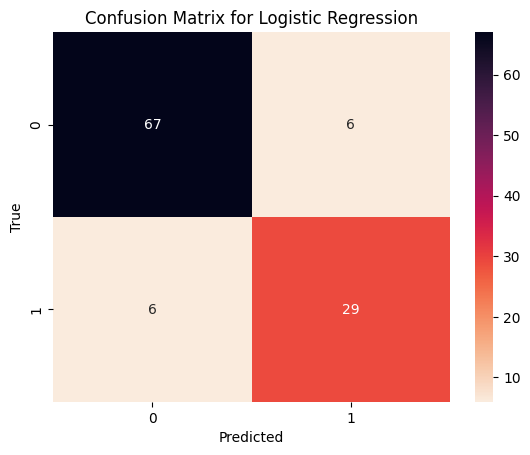

In [14]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(Y_test, Y_pred_logreg)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Logistic Regression")


In [15]:
print(classification_report(Y_test, Y_pred_logreg))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        73
           1       0.83      0.83      0.83        35

    accuracy                           0.89       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.89      0.89      0.89       108



Support Vector Classifier Algorithm


In [16]:

from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', random_state = 42)
svc=svc_model.fit(X_train, Y_train)

In [17]:
filename = 'Support Vector1.sav'
pickle.dump(svc, open(filename, 'wb'))
loaded_model_svc = pickle.load(open(filename, 'rb'))
Y_pred_svc = loaded_model_svc.predict(X_test)

In [18]:
Y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 87.03703703703704


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for SVC')]

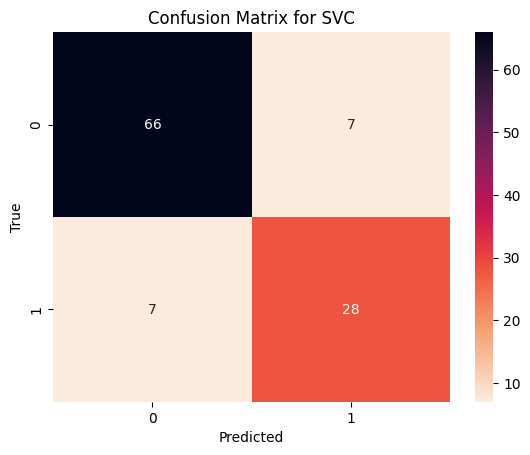

In [19]:
# Confusion matrix for  Support Vector Classifier
cm = confusion_matrix(Y_test, Y_pred_svc)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for SVC")

In [19]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        73
           1       0.83      0.83      0.83        35

    accuracy                           0.89       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.89      0.89      0.89       108



Decision Tree Algorithm

In [20]:

from sklearn.tree import DecisionTreeClassifier
decisiontree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dec_tree=decisiontree_model.fit(X_train, Y_train)

In [21]:
filename = 'Decision Tree1.sav'
pickle.dump(dec_tree, open(filename, 'wb'))
loaded_model_dec_tree = pickle.load(open(filename, 'rb'))
Y_pred_decisiontree = loaded_model_dec_tree.predict(X_test)

In [22]:
Y_pred_decisiontree = decisiontree_model.predict(X_test)
accuracy_decisiontree = accuracy_score(Y_test, Y_pred_decisiontree)
print("Decision tree: " + str(accuracy_decisiontree * 100))

Decision tree: 87.03703703703704


              precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.84      0.74      0.79        35

    accuracy                           0.87       108
   macro avg       0.86      0.84      0.85       108
weighted avg       0.87      0.87      0.87       108



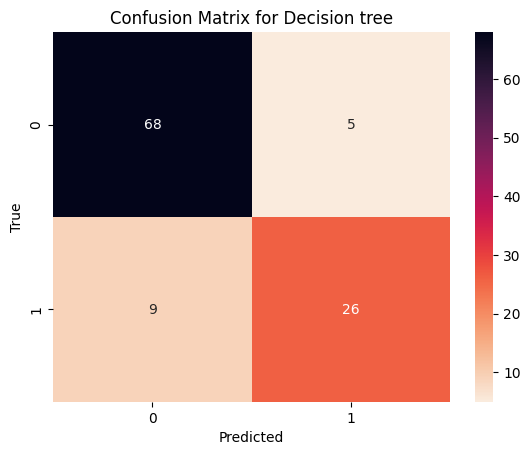

In [23]:
# Confusion matrix for  Decision tree
cm = confusion_matrix(Y_test, Y_pred_decisiontree)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Decision tree")
print(classification_report(Y_test, Y_pred_decisiontree))

In [24]:
print(classification_report(Y_test, Y_pred_decisiontree))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.84      0.74      0.79        35

    accuracy                           0.87       108
   macro avg       0.86      0.84      0.85       108
weighted avg       0.87      0.87      0.87       108



Random Forest Algorithm


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=9)
rf=rf_model.fit(X_train,Y_train)


In [26]:
filename = 'Random Forest1.sav'
pickle.dump(rf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_rf = loaded_model.predict(X_test)

In [27]:
Y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest: " + str(accuracy_rf * 100))

Random Forest: 87.96296296296296


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for Random Forest ')]

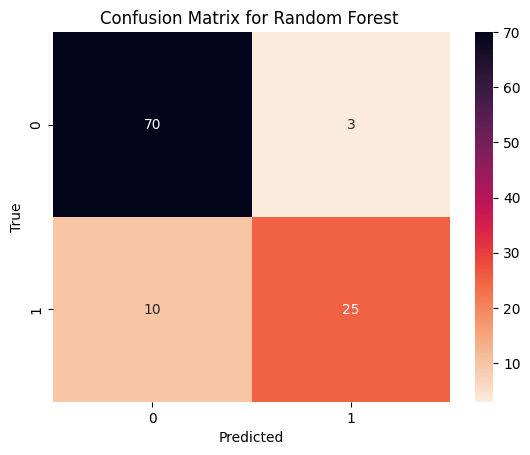

In [28]:
# Confusion matrix for  Random Forest
cm = confusion_matrix(Y_test, Y_pred_rf)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Random Forest ")

In [29]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        73
           1       0.89      0.71      0.79        35

    accuracy                           0.88       108
   macro avg       0.88      0.84      0.85       108
weighted avg       0.88      0.88      0.88       108



Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() 
nb= nb_model.fit(X_train, Y_train)
    
   

In [31]:
filename = 'Naive Bayes1.sav'
pickle.dump(nb, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_nb = loaded_model.predict(X_test)

In [32]:
#Y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print("Naive Bayes: " + str(accuracy_nb * 100))

Naive Bayes: 85.18518518518519


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes ')]

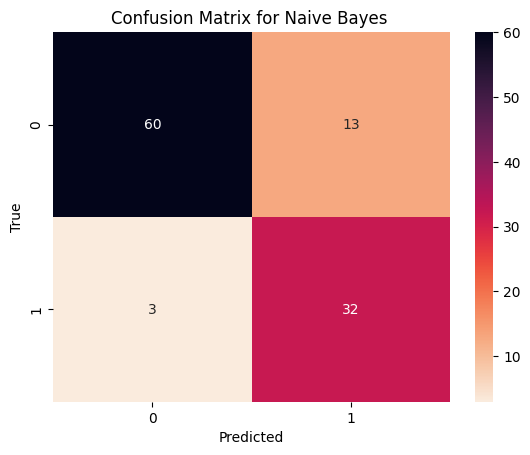

In [33]:
# Confusion matrix for Naive Bayes
cm = confusion_matrix(Y_test, Y_pred_nb)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Naive Bayes ")

In [34]:
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        73
           1       0.71      0.91      0.80        35

    accuracy                           0.85       108
   macro avg       0.83      0.87      0.84       108
weighted avg       0.87      0.85      0.86       108



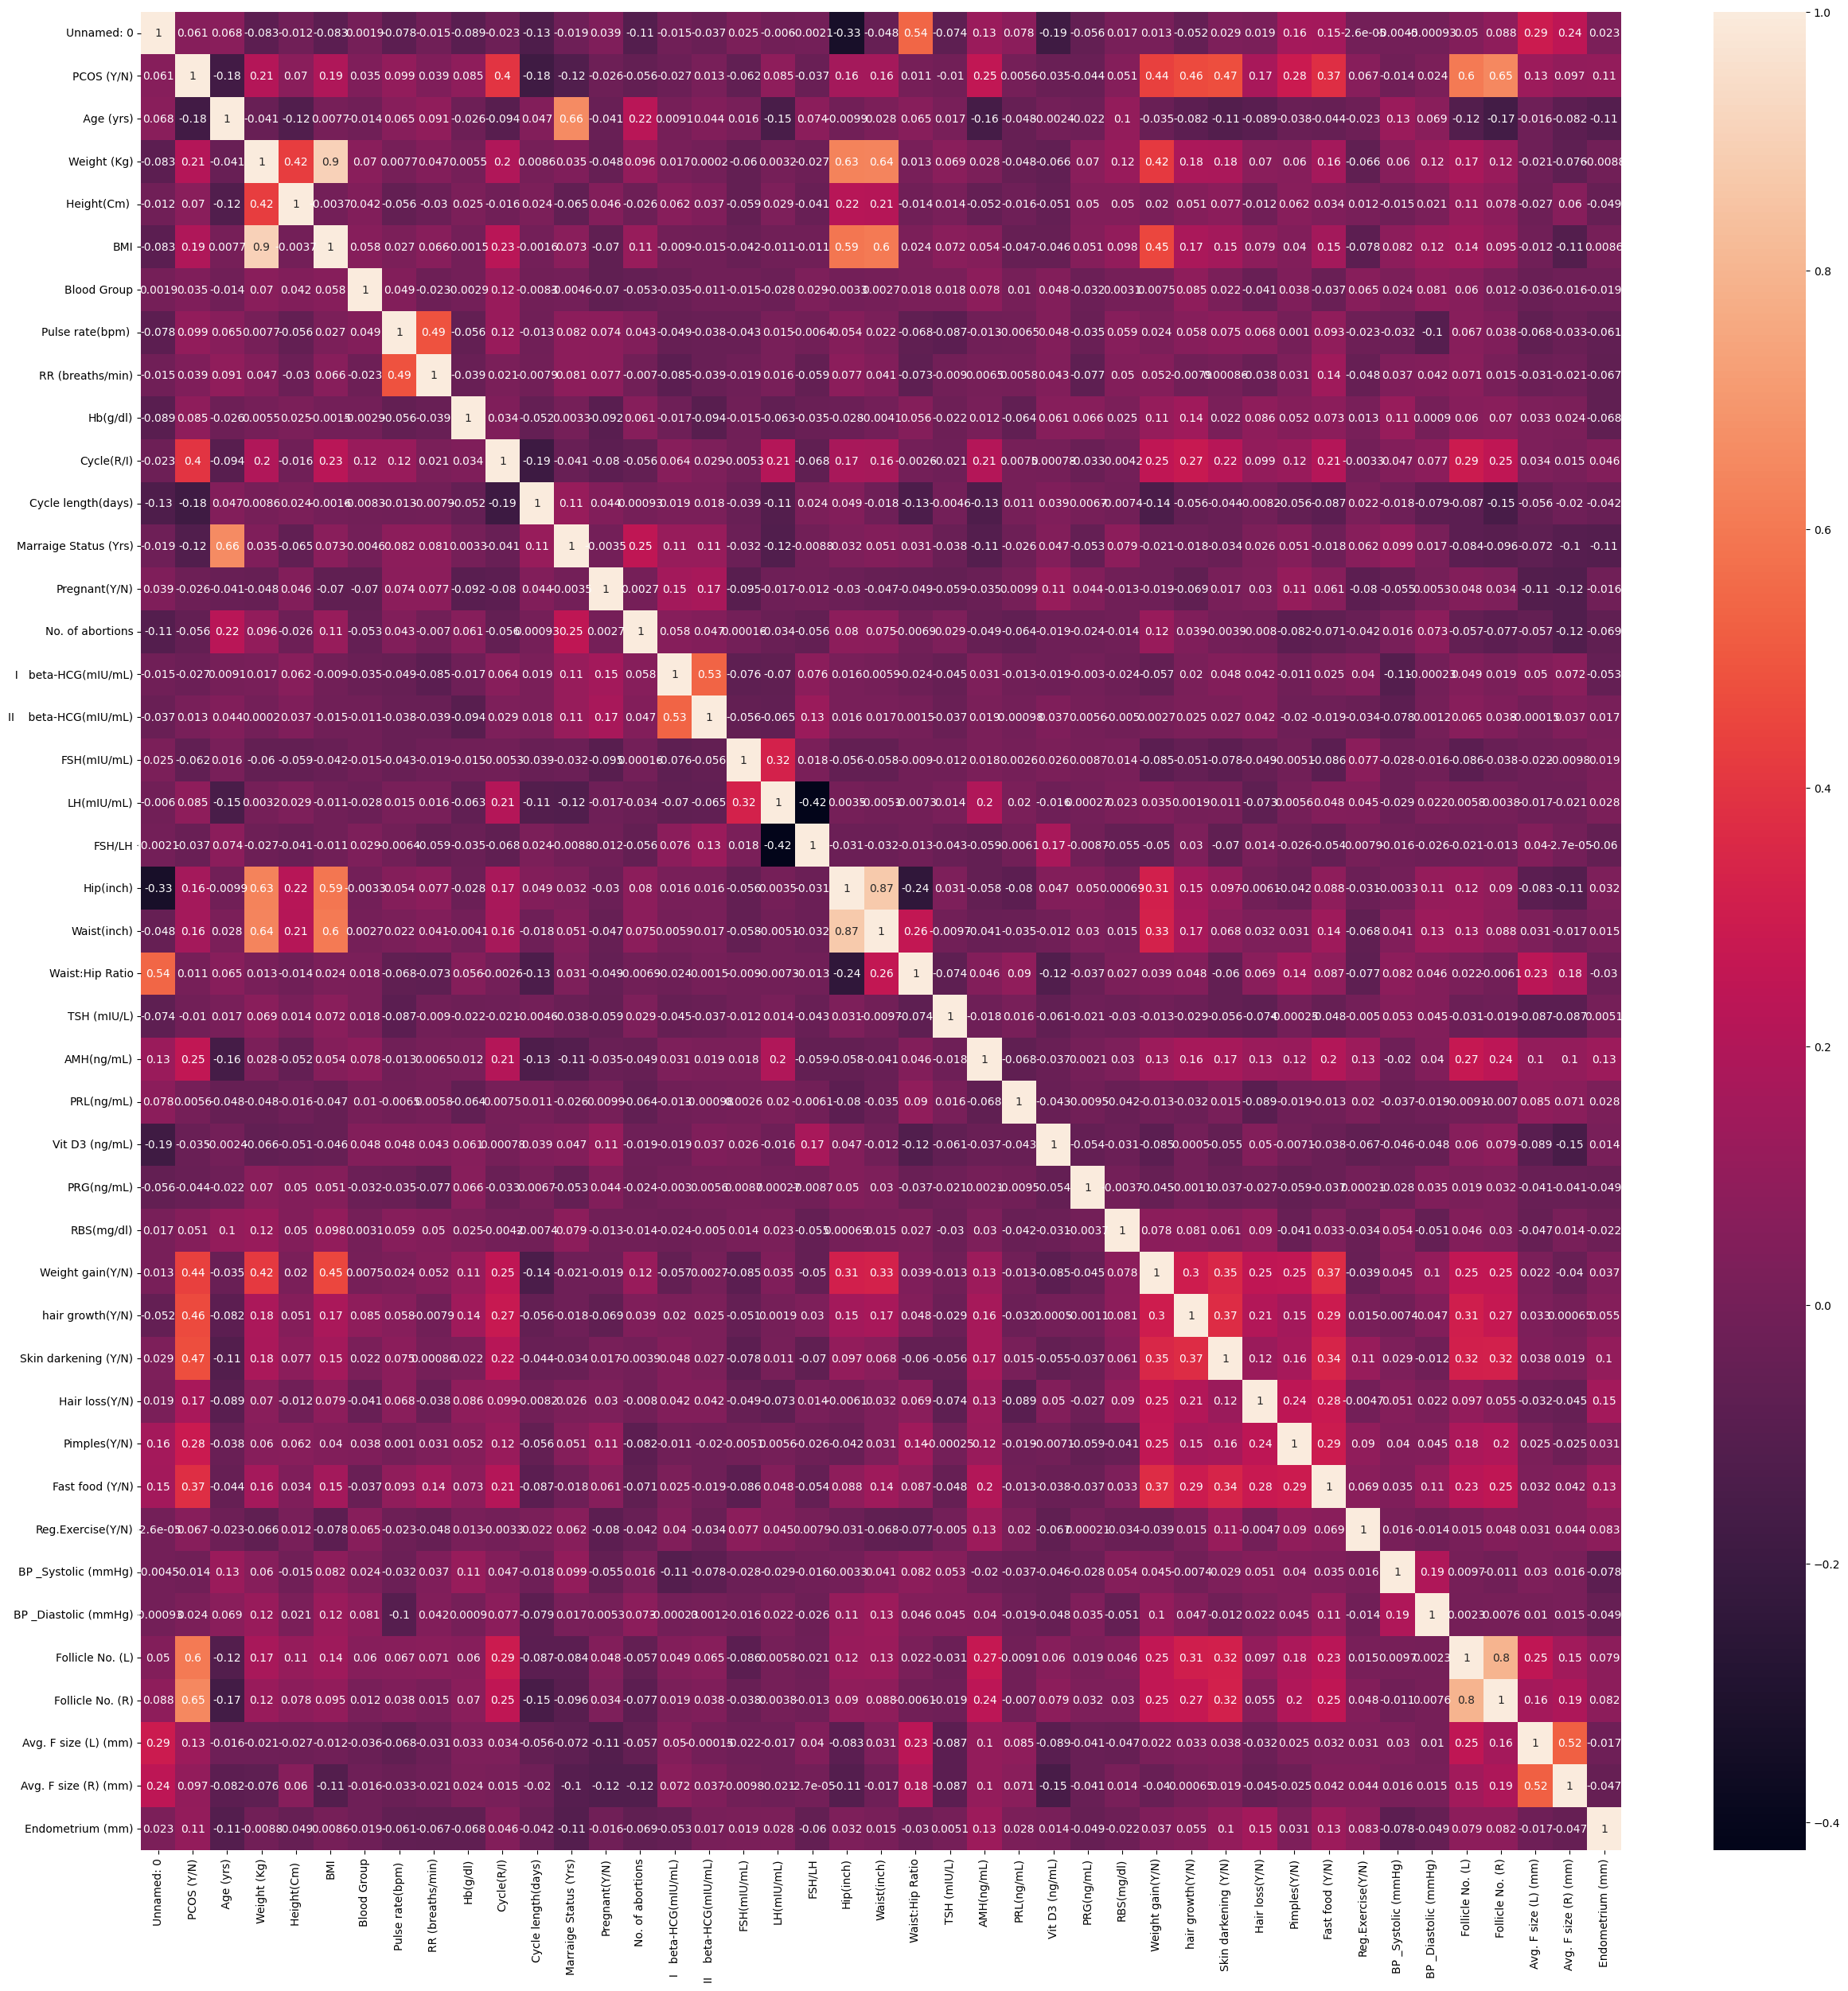

<Figure size 640x480 with 0 Axes>

In [35]:
plt.subplots(figsize=(30,30))
sns.heatmap(pcos.corr(), annot = True)
plt.show()
plt.savefig("corrmat.jpg")

In [ ]:
# Comparison of models
Models = [('Logistic Regression1', lr),('SVM1', svc),('Decision Tree1', dec_tree),('Random Forest1',rf),('Naive Bayes1',nb)]


results = []
names = []

for name, model in Models:
    kfold = KFold(n_splits=10)
    crossvalidation= cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(crossvalidation)
    names.append(name)
    outcome = "%s: %f (%f)" % (name, crossvalidation.mean(), crossvalidation.std())
    print(outcome)




C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Logistic Regression1: 0.885185 (0.061864)


In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
boxplot= plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()
plt.savefig("boxplot.png")